# Lab Overview

## Introduction
- Assume a neural network composed of two layers of neurons: input layer and output layer. We wish to train this network so when it is presented with a specific input it will have a certain output.
- Such a network is an assemply of perceptrons. They can only solve **linearly separable** problems. If you do not know this concept, search to find information about it.
- For this lab we are going to work with the [MNIST database of handwritten digits](http://yann.lecun.com/exdb/mnist) and train our network to recognise handwritten 0-9 digits. The MNIST database contains 60000 images which can used to train the network and 10000 more images for testing purposes. Each image is an  matrix representing a digit.

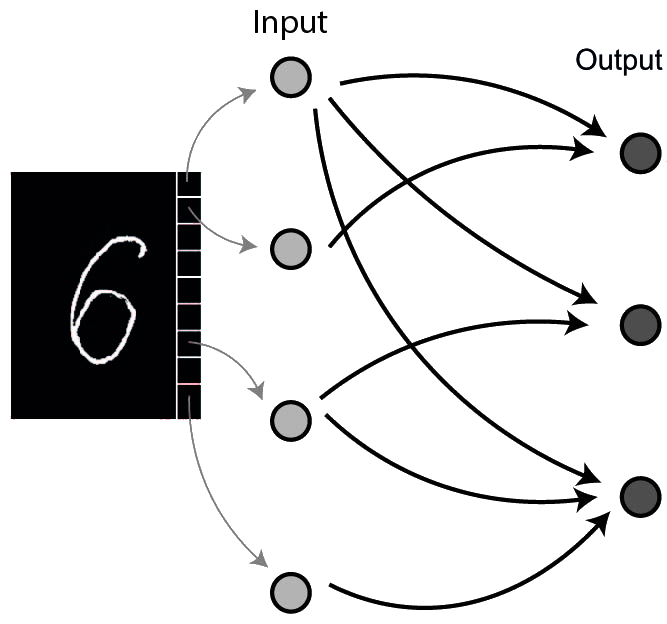

## The neural network

### Network initialisation


1. Generate a set of weights between the input and the hidden layer. The input layer should have 784 neurons, one for each pixel of the image.

2. Generate a set of weights between the hidden and the output layer. The output layer should have 10 neurons, one for each digit.

3. Generate two sets of bias, one for the hidden layer and one for the output layer. Bias is set to 0 to start with 


### Feedforward


1. Feed an image $\vec{x(\mu)}$ to the network,
   

2. Compute the input to each of the neurons of the output layer, $h^{(1)}_i = \sum_{j=1}^{784}w^{(1)}_{ij} x^{(0)}_j + b^{(1)}_i$ and their outputs with the use of the [sigmoid function](http://mathworld.wolfram.com/SigmoidFunction.html),$x^{(1)}_i = f(h^{(1)}_i) = \frac{1}{(1+e^{-h^{(1)}_i})}$.

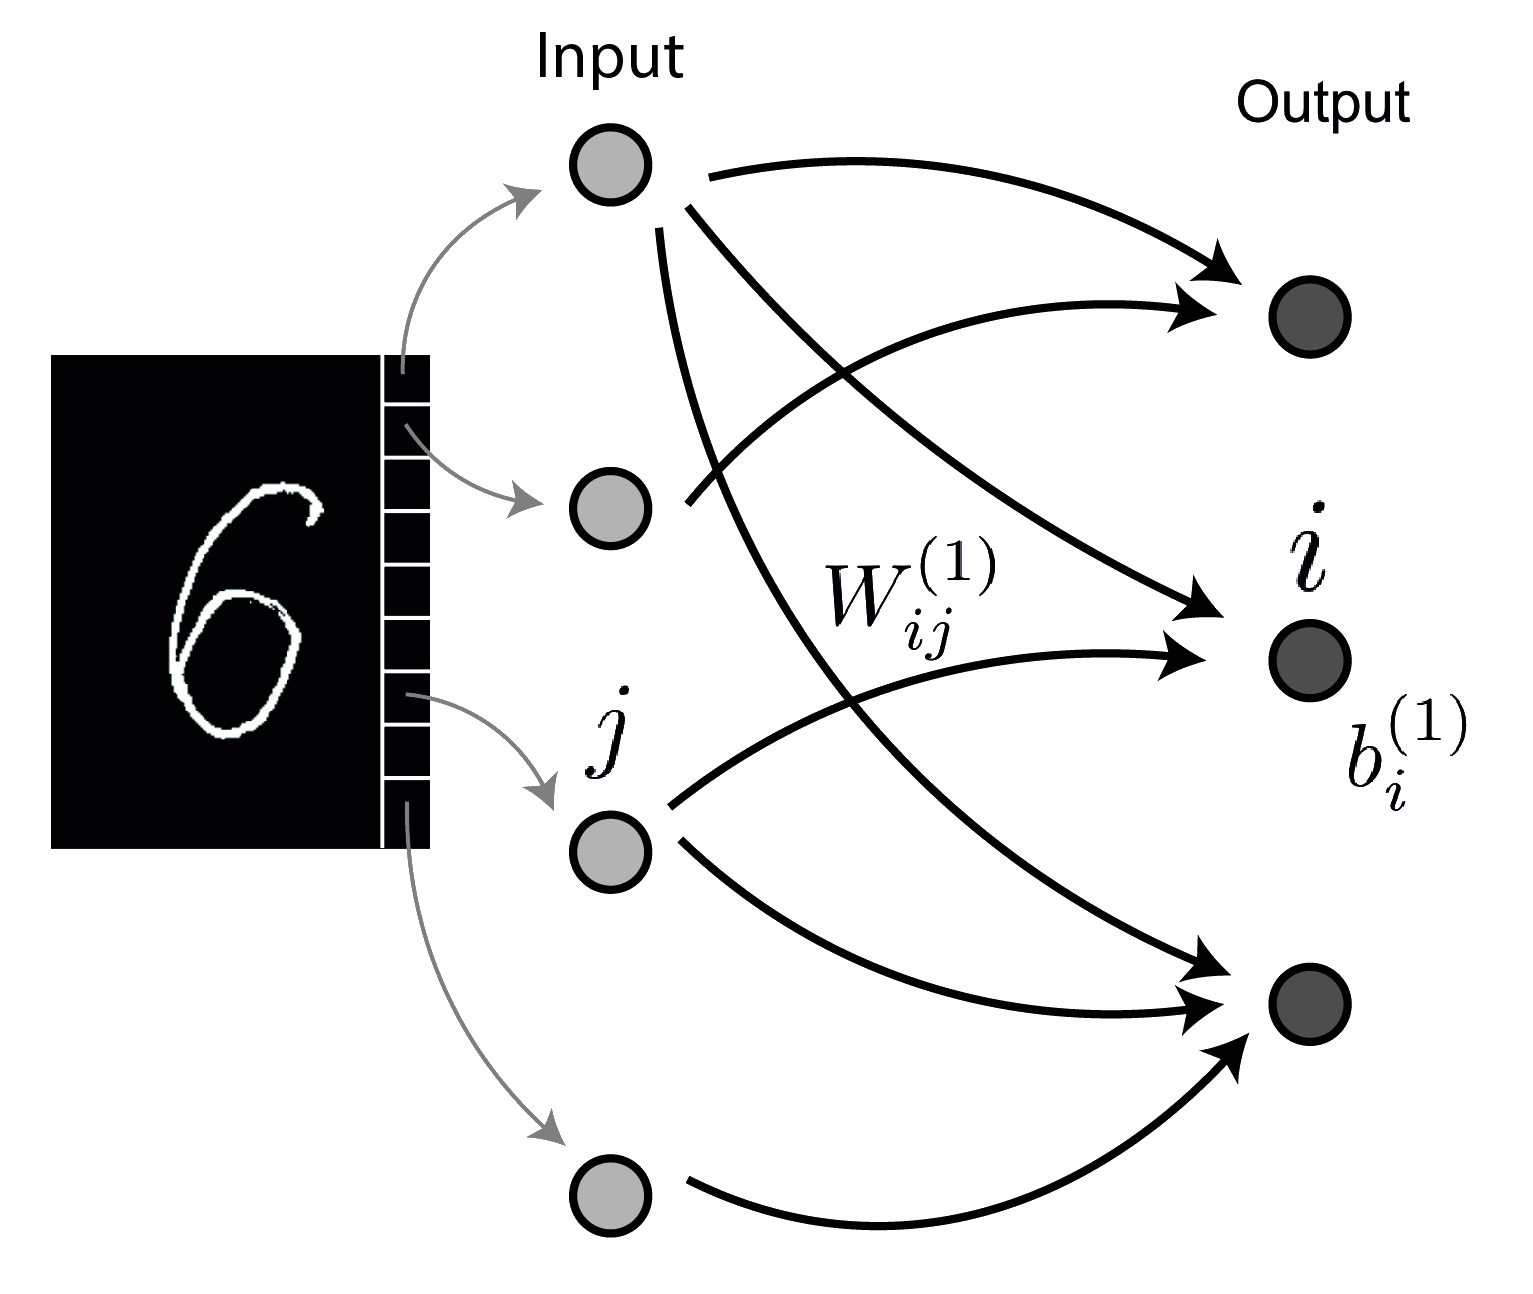

### Error

1. Calculate the error in the output of the neural network. If the input is an image of a zero digit it is expected that the first neuron of the input layer to be fully active, i.e has an output of 1, while the other neurons have outputs of 0. Thus the target output would be $t = [1,0,0,\dots,0]^T$ and, given that the output of the neural network is some $output$, the error is given by the formula $$E(\mu) = \sum_{i=1}^{n}\frac{1}{2}(t_i(\mu)-x^{(2)}_i(\mu))^2,$$ where $n$ is the number of neurons in the output layer of the network and $\mu$ is sample index. The total error per sample is then given by $$E/N = \sum_{\mu=1}^N \sum_{i=1}^{n}\frac{1}{2N}(t_i(\mu)-x^{(2)}_i(\mu))^2.$$



### Backpropagation on perceptrons (no hidden layer)
Here we will consider explicitly the logistic sigmoid activation function so we can use the result that the derivative of the logistic sigmoid is
$$ f'(h) = \frac{\partial f(h) }{\partial h } = f(h)(1-f(h)) $$ directly in the update rules.

1. Apply the delta rule between the output and the input layers. For the weight $w_{ij}$ we have 

$$\frac{\partial E}{\partial w_{\textrm{ij}} }=\frac{\partial E}{\partial x^{(1)}_i }\;\frac{\partial x^{(1)}_i }{\partial h^{(1)}_i } \; \frac{\partial h^{(1)}_i }{\partial w_{\textrm{ij}} } \; =-\left( t_i -x^{(1)}_i \right)\; x^{(1)}_i \;\left(1-x^{(1)}_i \right) \; x^{(0)}_j,$$ 

and we can define  $\delta^{(1)}_i = \left(t_i - x^{(1)}_i \right)x^{(1)}_i \;\left(1-x^{(1)}_i \right) $.

2. Update the weights between the input and the output layers.  For the weight $w_{ij}$ we have the update after a single input $${\Delta w}_{\textrm{ij}} = \eta \delta^{(1)}_i x^{(0)}_j.$$



## Exercises

The code provided first loads the MNIST database and generates a neural network using the parameters provided. Then it trains the network and tests it using the testing set of the MNIST database.

1. Test the network using the test dataset, then compute and comment on it's accuracy.


2. A bias is included in the calculation of the activation but is set to zero and is not trained. Derive the learning rule and code the training of the bias alongside the weights. It may help to think of the bias as an extra weight where the input value is fixed to 1.


3. Try to use ten classes and to optimise the network hyperparameters.

In [1]:
import numpy as np
import numpy.matlib 
import math
import matplotlib.pyplot as plt
import csv

In [2]:
# Load the MNIST dataset:
#     The MNIST dataset contains 60,000 training samples.
#     To start with we will limit this to 5 classes (the first 5 digits in the dataset) to simplify development
#     Reading the data file gives an array of img_size by no. of samples
#     so we will work on the transposed array instead 

from scipy.io import loadmat

mnist = loadmat('MNIST.mat')

# Read the train set
x_train = mnist['x_train']
# Read the train labels
trainlabels = mnist['trainlabels']

# Read the test set
x_test = mnist['x_test']
# Read the test labels
testlabels = mnist['testlabels']

#We select the data for three classes that we want to classify

N_class=10

Index_tr=[]
Index_te=[]

for i in range(N_class):
    
    #Find the indexes of the training set corresponding to class i
    ind_tr=np.where(trainlabels==i)[0]
    #Find the indexes of the test set corresponding to class i
    ind_te=np.where(testlabels==i)[0]
    
    # Append the training indexes in a list
    Index_tr.append(ind_tr)
    # Append the testing indexes in a list
    Index_te.append(ind_te)

# Reshape the lists to be a 1-d array    
Index_tr=np.concatenate(Index_tr,axis=0)
Index_te=np.concatenate(Index_te,axis=0)

# Create a training set and a test set with data belonging to the classes considered only
x_train=np.copy(x_train[Index_tr,:])
x_test=np.copy(x_test[Index_te,:])

# Compute the size of the train and test datasets
N_tr=np.shape(Index_tr)[0]
N_te=np.shape(Index_te)[0]

# Create one-hot encoding labels for train and test datasets
y_train=np.zeros([N_tr,N_class])
y_test=np.zeros([N_te,N_class])

for i in range(N_tr):
    
    y_train[i,int(trainlabels[Index_tr[i]])]=1

for i in range(N_te):

    y_test[i,int(testlabels[Index_te[i]])]=1

    
n_samples, img_size = x_train.shape


FileNotFoundError: [Errno 2] No such file or directory: 'MNIST.mat'

In [ ]:
# Example of image, take the transpose to see it in the right orientation
example_image=np.reshape(x_train[0],(28,28))
plt.imshow(example_image.T)
plt.show()

In [ ]:
# The number of epochs is a hyperparameter that defines the number times that the learning algorithm 
# will work through the entire training dataset.

# The batch size is a hyperparameter that defines the number of samples to work through before 
# updating the internal model parameters. 

# ref: https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

n_epoch = 10
batch_size = 20
n_batches = int(math.floor(n_samples/batch_size))

# define the size of each of the layers in the network
n_input_layer  = img_size
n_output_layer = N_class

# eta is the learning rate
eta = 0.5


In [ ]:
# Initialize a simple network
# For W1  columns are the input and the rows are the output.
# W1: Number of columns (input) needs to be equal to the number of features 
#     of the  MNIST digits, thus p. Number of rows (output) should be equal to the 
#     number of digits we wish to find (classification).


W1 = np.random.uniform(0,1,(n_output_layer, n_input_layer))


# The following normalises the random weights so that the sum of each row =1
W1 = np.divide(W1,np.matlib.repmat(np.sum(W1,1)[:,None],1,n_input_layer))


In [ ]:
# Initialize the biases

bias_W1 = np.zeros((n_output_layer,))


In [ ]:
# Keep track of the network inputs and average error per epoch
errors = np.zeros((n_epoch,))

In [ ]:
# Train the network

for i in range(0,n_epoch):
    
    # We will shuffle the order of the samples each epoch
    shuffled_idxs = np.random.permutation(n_samples)
    
    for batch in range(0,n_batches):
        # Initialise the gradients for each batch
        dW1 = np.zeros(W1.shape)


        dbias_W1 = np.zeros(bias_W1.shape)


        # Loop over all the samples in the batch
        for j in range(0,batch_size):

            # Input (random element from the dataset)
            idx = shuffled_idxs[batch*batch_size + j]
            x0 = x_train[idx]
            
            # Form the desired output, the correct neuron should have 1 the rest 0
            desired_output = y_train[idx]

            # Neural activation: input layer -> hidden layer
            h1 = np.dot(W1,x0)+bias_W1

            # Apply the sigmoid function
            x1 = 1/(1+np.exp(-h1))

           
            # Compute the error signal
            e_n = desired_output - x1
                
            # Backpropagation: output layer -> hidden layer
            delta1 = x1*(1-x1) * e_n              
      
            dW1 += np.outer(delta1,x0)
            dbias_W1 += delta1

            # Store the error per epoch
            errors[i] = errors[i] + 0.5*np.sum(np.square(e_n))/n_samples

        # After each batch update the weights using accumulated gradients

        W1 += eta*dW1/batch_size

        bias_W1 += eta*dbias_W1/batch_size


    print( "Epoch ", i+1, ": error = ", errors[i])

In [ ]:
# Plot the performance
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Average error per epoch')
plt.show()

In [ ]:
# TODO: use the test set to compute the network's accuracy
n = x_test.shape[0]

p_ra = 0
correct_value = np.zeros((n,))
predicted_value = np.zeros((n,))

for i in range(0, n):
    x0 = x_test[i]
    y = y_test[i]
    
    correct_value[i] = np.argmax(y)
    
    h1 = np.dot(W1, x0) + bias_W1
    x1 = 1 / (1 + np.exp(-h1))
     
          
    predicted_value[i] = np.argmax(x1)
            
    if predicted_value[i] == correct_value[i]: 
        p_ra = (p_ra + 1)

accuracy = 100*p_ra/n 
print("Accuracy (percentage of correct classifications) = ", accuracy)